In [1]:
# load bluesky data
from datasets import load_dataset
import pandas as pd

dataset = load_dataset("withalim/bluesky-posts")
bsky_posts = [split.to_pandas() for split in dataset.values()] # collect all datasets

bsky_posts = pd.concat(bsky_posts ,ignore_index=True)


Resolving data files:   0%|          | 0/21 [00:00<?, ?it/s]

In [3]:
bsky_posts_filtered = bsky_posts.copy()
print(bsky_posts_filtered.shape)
bsky_posts_filtered.head()

(7877660, 6)


,text,created_at,author,uri,has_images,reply_to
0,yo,1001-01-11T01:11:11.804Z,jarivi.bsky.social,at://did:plc:kblt2p6hbypqurirkc723vht/app.bsky...,False,None
1,:(,1492-05-29T14:26:34Z,pawlos.bsky.social,at://did:plc:qncafui27l2c5djobao5nebr/app.bsky...,False,at://did:plc:uh3qfh2gozpm3twcoc7gammd/app.bsky...
2,test,1813-11-29T14:05:40.096Z,val9000.bsky.social,at://did:plc:wgmc6qawor67h4tguhzph7gs/app.bsky...,False,None
3,I posted this 100 years ago!,1924-11-30T09:40:00Z,justanotherenemy.com,at://did:plc:jr6bnkwh5ez3wezkuy4ergxj/app.bsky...,False,None
4,Nope,1947-11-29T14:24:00.001Z,val9000.bsky.social,at://did:plc:wgmc6qawor67h4tguhzph7gs/app.bsky...,False,None


In [43]:
import pytz

# Define US Central Time timezone
central_time = pytz.timezone('US/Central')

bsky_posts_filtered = (
    bsky_posts_filtered.assign(
        created_at=pd.to_datetime(bsky_posts_filtered['created_at'], errors='coerce')
    ).dropna(subset=['created_at'])
)

bsky_posts_filtered = bsky_posts_filtered.assign(
    created_at_central=bsky_posts_filtered['created_at'].dt.tz_convert(central_time),
    date = lambda df: df['created_at_central'].dt.date,
    year=lambda df: df['created_at_central'].dt.year,
    month=lambda df: df['created_at_central'].dt.month,
    day_of_week=lambda df: df['created_at_central'].dt.day_name(),
    hour_24=lambda df: df['created_at_central'].dt.hour,  # 24-hour format
    hour_12=lambda df: df['created_at_central'].dt.strftime('%I'),  # 12-hour format
    am_pm=lambda df: df['created_at_central'].dt.strftime('%p')  # AM/PM
)

bsky_posts_filtered = bsky_posts_filtered.drop(columns=['hour'], errors='ignore')

bsky_posts_filtered.head()

,text,created_at,author,uri,has_images,reply_to,created_at_central,year,month,day_of_week,hour_24,hour_12,am_pm,date
2,test,1813-11-29 14:05:40.096000+00:00,val9000.bsky.social,at://did:plc:wgmc6qawor67h4tguhzph7gs/app.bsky...,False,None,1813-11-29 08:14:40.096000-05:51,1813,11,Monday,8,08,AM,1813-11-29
3,I posted this 100 years ago!,1924-11-30 09:40:00+00:00,justanotherenemy.com,at://did:plc:jr6bnkwh5ez3wezkuy4ergxj/app.bsky...,False,None,1924-11-30 03:40:00-06:00,1924,11,Sunday,3,03,AM,1924-11-30
4,Nope,1947-11-29 14:24:00.001000+00:00,val9000.bsky.social,at://did:plc:wgmc6qawor67h4tguhzph7gs/app.bsky...,False,None,1947-11-29 08:24:00.001000-06:00,1947,11,Saturday,8,08,AM,1947-11-29
5,スポーツに参加し、莉緒と同じチームになりました。莉緒はクールですが、実力は確かです。\n\n...,1970-01-01 00:00:00+00:00,feed.shigepon.net,at://did:plc:h3ekpoifurbyogyvfjapk6rx/app.bsky...,False,None,1969-12-31 18:00:00-06:00,1969,12,Wednesday,18,06,PM,1969-12-31
6,スポーツ活動中、莉緒はあなたに近づいてきて、何かを尋ねました。\n\n0 → 次に進む,1970-01-01 00:00:00+00:00,feed.shigepon.net,at://did:plc:h3ekpoifurbyogyvfjapk6rx/app.bsky...,False,None,1969-12-31 18:00:00-06:00,1969,12,Wednesday,18,06,PM,1969-12-31


In [44]:
# Remove leading 0 from hour_12
bsky_posts_filtered['hour_12'] = bsky_posts_filtered['hour_12'].astype(str).str.lstrip('0')

# Combine hours with AM/PM
bsky_posts_filtered['hour'] = bsky_posts_filtered['hour_12'] + bsky_posts_filtered['am_pm']
bsky_posts_filtered['hour'] = bsky_posts_filtered['hour'].str.replace('AM', ' a.m.', regex=False)
bsky_posts_filtered['hour'] = bsky_posts_filtered['hour'].str.replace('PM', ' p.m.', regex=False)

bsky_posts_filtered.head()


,text,created_at,author,uri,has_images,reply_to,created_at_central,year,month,day_of_week,hour_24,hour_12,am_pm,date,hour
2,test,1813-11-29 14:05:40.096000+00:00,val9000.bsky.social,at://did:plc:wgmc6qawor67h4tguhzph7gs/app.bsky...,False,None,1813-11-29 08:14:40.096000-05:51,1813,11,Monday,8,8,AM,1813-11-29,8 a.m.
3,I posted this 100 years ago!,1924-11-30 09:40:00+00:00,justanotherenemy.com,at://did:plc:jr6bnkwh5ez3wezkuy4ergxj/app.bsky...,False,None,1924-11-30 03:40:00-06:00,1924,11,Sunday,3,3,AM,1924-11-30,3 a.m.
4,Nope,1947-11-29 14:24:00.001000+00:00,val9000.bsky.social,at://did:plc:wgmc6qawor67h4tguhzph7gs/app.bsky...,False,None,1947-11-29 08:24:00.001000-06:00,1947,11,Saturday,8,8,AM,1947-11-29,8 a.m.
5,スポーツに参加し、莉緒と同じチームになりました。莉緒はクールですが、実力は確かです。\n\n...,1970-01-01 00:00:00+00:00,feed.shigepon.net,at://did:plc:h3ekpoifurbyogyvfjapk6rx/app.bsky...,False,None,1969-12-31 18:00:00-06:00,1969,12,Wednesday,18,6,PM,1969-12-31,6 p.m.
6,スポーツ活動中、莉緒はあなたに近づいてきて、何かを尋ねました。\n\n0 → 次に進む,1970-01-01 00:00:00+00:00,feed.shigepon.net,at://did:plc:h3ekpoifurbyogyvfjapk6rx/app.bsky...,False,None,1969-12-31 18:00:00-06:00,1969,12,Wednesday,18,6,PM,1969-12-31,6 p.m.


/var/folders/gr/mhlc8kfs39b7v4v54d1fd4bc0000gn/T/ipykernel_4403/923922561.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
/var/folders/gr/mhlc8kfs39b7v4v54d1fd4bc0000gn/T/ipykernel_4403/923922561.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


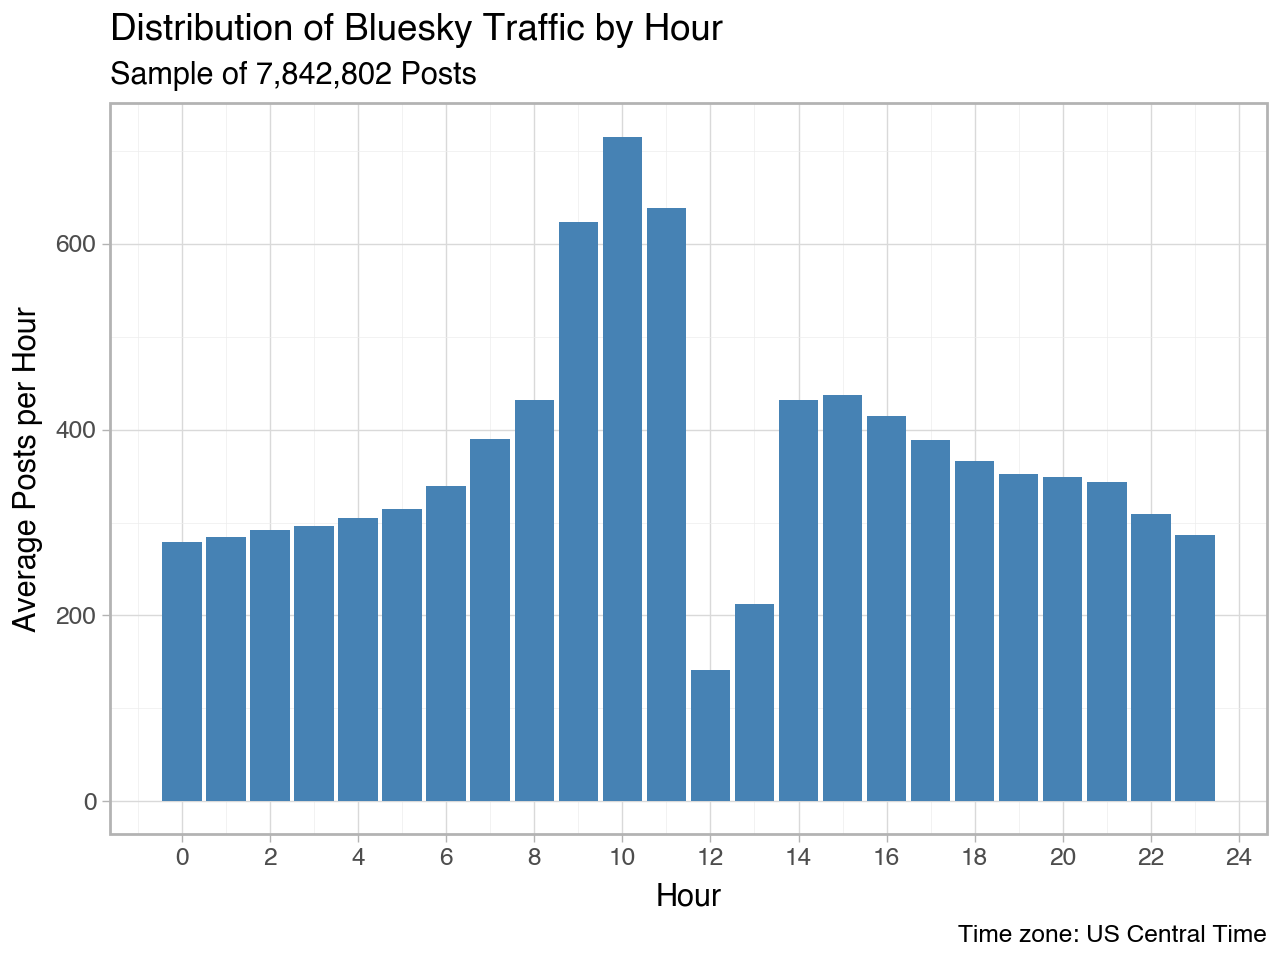

In [84]:
from plotnine import *
import pandas as pd

# Ensure day of week is properly ordered
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
bsky_posts_filtered['day_of_week'] = pd.Categorical(
    bsky_posts_filtered['day_of_week'],
    categories=day_order,
    ordered=True
)

# Make hour variables continuous
bsky_posts_filtered['hour_24'] = bsky_posts_filtered['hour_24'].astype(int)
day_counts = bsky_posts_filtered.groupby('day_of_week')['date'].nunique().reset_index(name='num_days')

hour_counts = bsky_posts_filtered.groupby(['day_of_week', 'hour_24']).size().reset_index(name='total_posts')

# Join with day counts and calculate average
hour_avg = pd.merge(hour_counts, day_counts, on='day_of_week')
hour_avg['avg_posts'] = hour_avg['total_posts'] / hour_avg['num_days']

# hour averages as a percentage of total posts
hour_avg['avg_posts_pct'] = hour_avg['avg_posts'] / hour_avg['total_posts'].sum() * 100

# average posts per hour as a percentage of total posts
hour_avg['avg_posts_pct'] = hour_avg['total_posts'] / hour_avg['total_posts'].sum() * 100

plot = (
    ggplot(hour_avg, aes(x='hour_24', y='avg_posts')) +
    geom_bar(stat='identity', fill='steelblue', alpha=1) +
    labs(
         title=f'Distribution of Bluesky Traffic by Hour',
        subtitle= f'Sample of {hour_avg["total_posts"].sum():,.0f} Posts',
        x='Hour',
        y='Average Posts per Hour',
        caption='Time zone: US Central Time'
    ) +
    theme_light() +
    scale_x_continuous(breaks=range(0, 25, 2))
)

plot

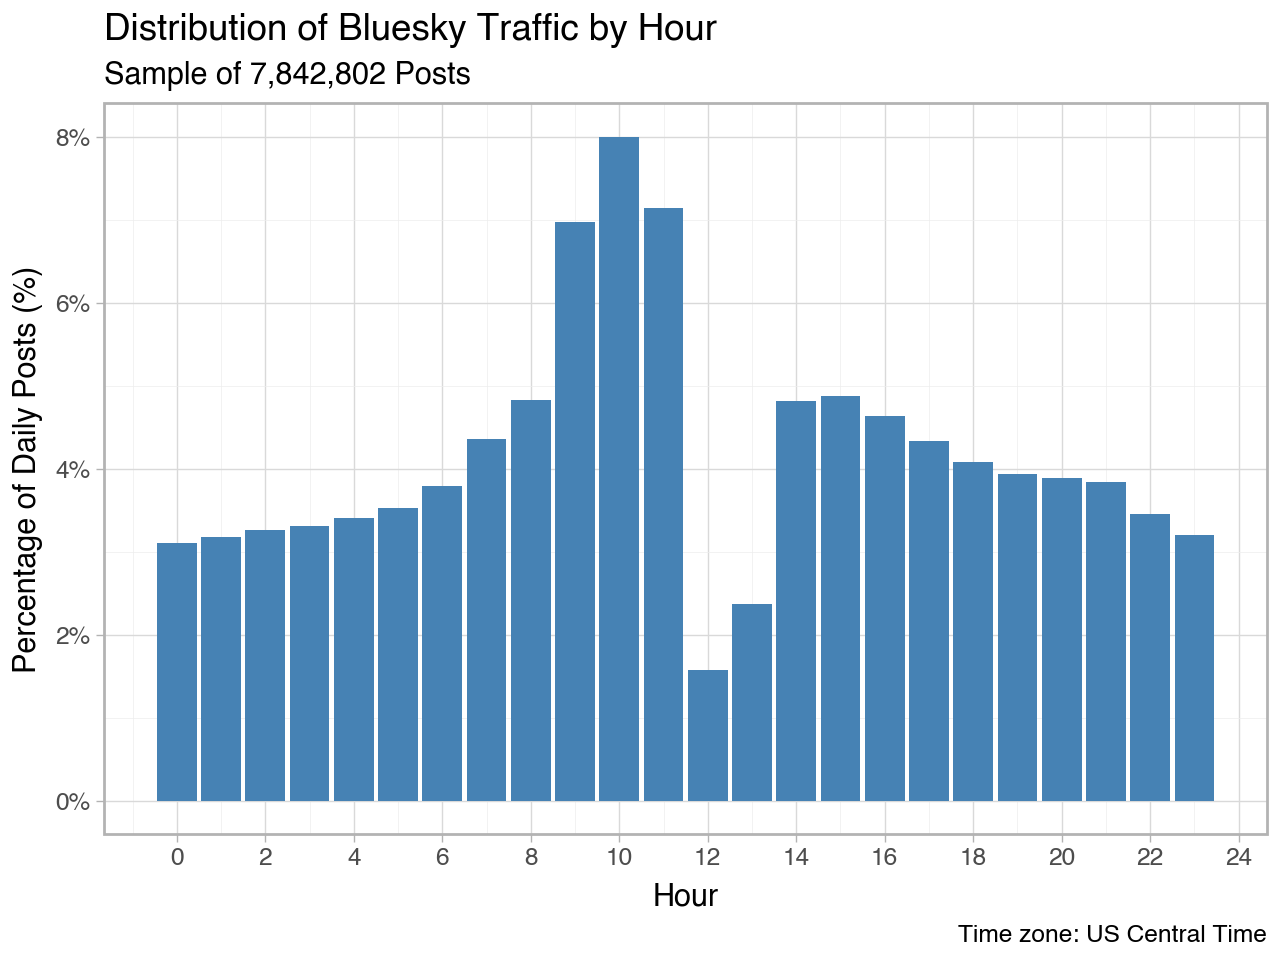

In [83]:

# Update plot to use percentages
plot = (
    ggplot(hour_avg, aes(x='hour_24', y='avg_posts_pct')) +
    geom_bar(stat='identity', fill='steelblue', alpha = 1) +
    # facet_wrap('~day_of_week', ncol=2) +  
    labs(
        title=f'Distribution of Bluesky Traffic by Hour',
        subtitle= f'Sample of {hour_avg["total_posts"].sum():,.0f} Posts',
        x='Hour',
        y='Percentage of Daily Posts (%)',
        caption='Time zone: US Central Time'
    ) +
    theme_light() +
    scale_x_continuous(breaks=range(0, 25, 2)) + 
    scale_y_continuous(labels=lambda l: [f'{int(x)}%' for x in l])  # Format y-axis as percentages
    # scal
)

plot

In [5]:
# november posts 
november_posts = bsky_posts_filtered[(bsky_posts_filtered['month'] == 11) & (bsky_posts_filtered['year'] == 2024)]
# group by author and count posts
author_counts = november_posts['author'].value_counts().reset_index()
author_counts.columns = ['author', 'post_count']
# Add an index just for plotting
author_counts['author_index'] = range(len(author_counts))

In [71]:
# Calculate the 99th percentile of post_count
percentile_99 = author_counts['post_count'].quantile(0.99)

# Filter out rows where post_count is above the 99th percentile
author_counts_filtered = author_counts[author_counts['post_count'] <= percentile_99]

author_counts_filtered.reset_index(drop=True, inplace=True)
# Display the filtered DataFrame
author_counts_filtered.describe()

,post_count,author_index
count,1.314679e+06,1.314679e+06
mean,3.854722e+00,6.829450e+05
std,5.041863e+00,3.795153e+05
min,1.000000e+00,2.560600e+04
25%,1.000000e+00,3.542755e+05
50%,2.000000e+00,6.829450e+05
75%,4.000000e+00,1.011614e+06
max,3.400000e+01,1.340284e+06


In [72]:
percentile_95 = author_counts['post_count'].quantile(0.95)
percentile_95

16.0

In [73]:
median = author_counts['post_count'].median()
median

2.0

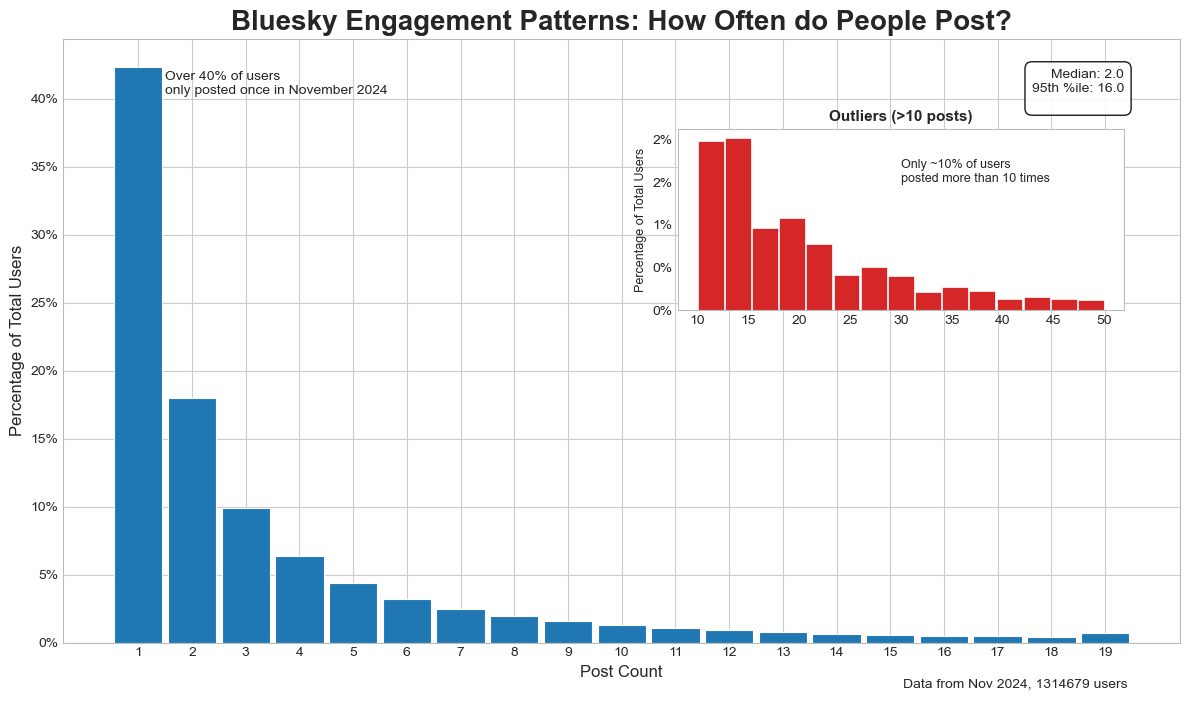

In [83]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker as mtick

# Set a cleaner style
plt.style.use('seaborn-v0_8-whitegrid')

fig, ax = plt.subplots(figsize=(12, 7))

# Calculate total number of authors
total_authors = len(author_counts_filtered)

# Calculate percentages for main plot
main_bins = range(1, 21)
main_counts, _ = np.histogram(author_counts_filtered['post_count'], bins=main_bins)
main_percentages = [count / total_authors * 100 for count in main_counts]

# Plot main histogram
ax.bar(range(1, 20), main_percentages, width=0.9, color='#1f77b4', edgecolor='white', linewidth=0.8)
ax.set_title('Bluesky Engagement Patterns: How Often do People Post?', fontsize=20, fontweight='bold')
ax.set_xlabel('Post Count', fontsize=12)
ax.set_ylabel('Percentage of Total Users', fontsize=12)
ax.set_xticks(range(1, 20))

# Format y-axis as integer percentages with % symbol
ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))

# Add statistics 
stats_text = f'Median: 2.0\n95th %ile: 16.0\n'
ax.text(0.95, 0.95, stats_text, transform=ax.transAxes, 
        verticalalignment='top', horizontalalignment='right',
        bbox={'facecolor': 'white', 'alpha': 0.9, 'pad': 1, 'boxstyle': 'round,pad=0.5'})

# Add explanatory annotation
ax.annotate('Over 40% of users\nonly posted once in November 2024',  
            xy=(1, main_percentages[0]), 
            xytext=(1.5, main_percentages[0] -2),
            fontsize=10)

# Add an inset axis for outliers
axins = ax.inset_axes([0.55, 0.55, 0.4, 0.3])
outliers = author_counts[author_counts['post_count'] > 10]

if len(outliers) > 0:
    outlier_bins = 15
    max_outlier = outliers['post_count'].max()
    bin_edges = np.linspace(10, max_outlier, outlier_bins + 1)
    outlier_counts, _ = np.histogram(outliers['post_count'], bins=bin_edges)
    outlier_percentages = [count / total_authors * 100 for count in outlier_counts]
    
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    outlier_width = (max_outlier-10)/outlier_bins * 0.95  # wider bars with minimal gaps
    axins.bar(bin_centers, outlier_percentages, width=outlier_width, color='#d62728', 
              edgecolor='white', linewidth=0.5)
    axins.set_title('Outliers (>10 posts)', fontsize=11, fontweight='bold')
    axins.set_ylabel('Percentage of Total Users', fontsize=9)
    
    axins.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
    
    # Add explanatory annotation for outliers
    axins.annotate('Only ~10% of users\nposted more than 10 times', 
                xy=(15, 1.5), 
                xytext=(30, 1.5),
                fontsize=9)
    axins.grid(False)

plt.figtext(0.85, 0.01, f'Data from Nov 2024, {total_authors} users', ha='center', fontsize=10)


    
for axis in [ax, axins]:
    for spine in axis.spines.values():
        spine.set_edgecolor('#BBBBBB')
        spine.set_linewidth(0.8)

plt.tight_layout()
plt.show()